In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from imageio import imread
import codecs
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")
column_rename = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}
terrorism_df.rename(columns=column_rename,inplace=True)
terrorism_df= terrorism_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [4]:
#terrorism_df.isnull().sum()
#terrorism_df = terrorism_df.dropna()
terrorism_df['total_effected'] = terrorism_df['Killed'] + terrorism_df['Wounded']

In [5]:
terrorism_df.shape

(181691, 18)

In [23]:
#terrorism_df.head(1).T

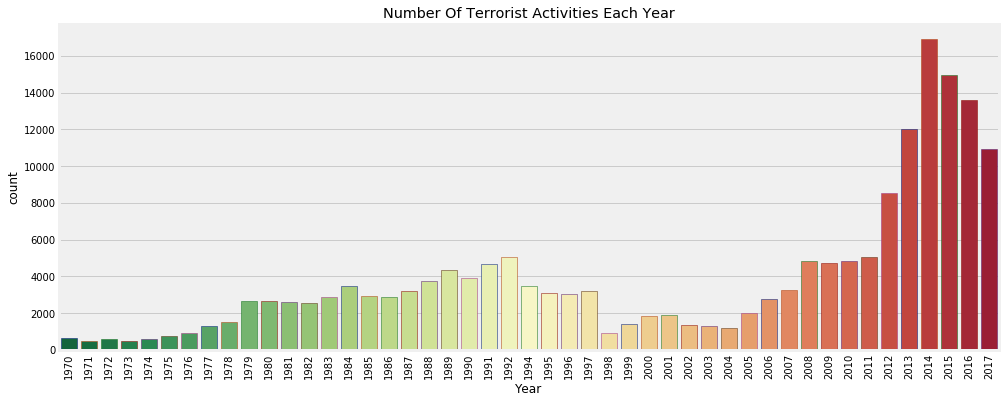

In [7]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terrorism_df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

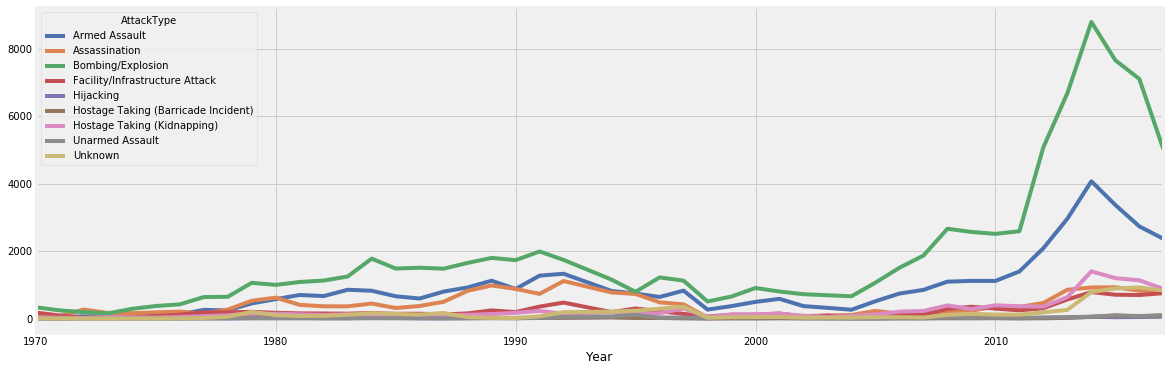

In [24]:
terror_region=pd.crosstab(terrorism_df.Year,terrorism_df.AttackType)
terror_region.plot(color=sns.color_palette('deep',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

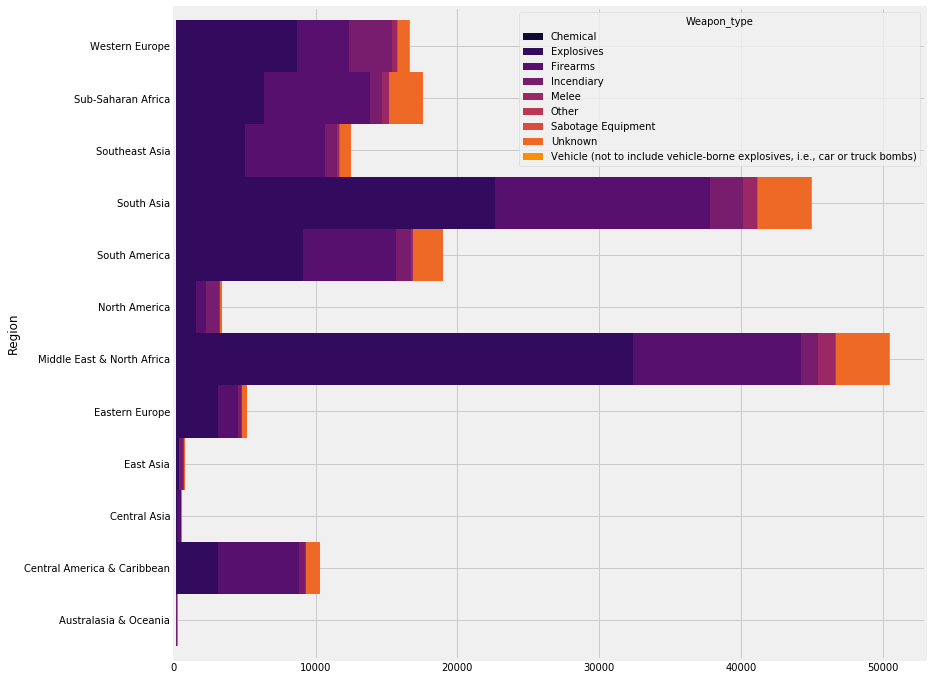

In [40]:
top_weap10=terrorism_df[terrorism_df['Weapon_type'].isin(terrorism_df['Weapon_type'].value_counts()[:9].index)]
pd.crosstab(top_weap10.Region,top_weap10.Weapon_type).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',11))
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

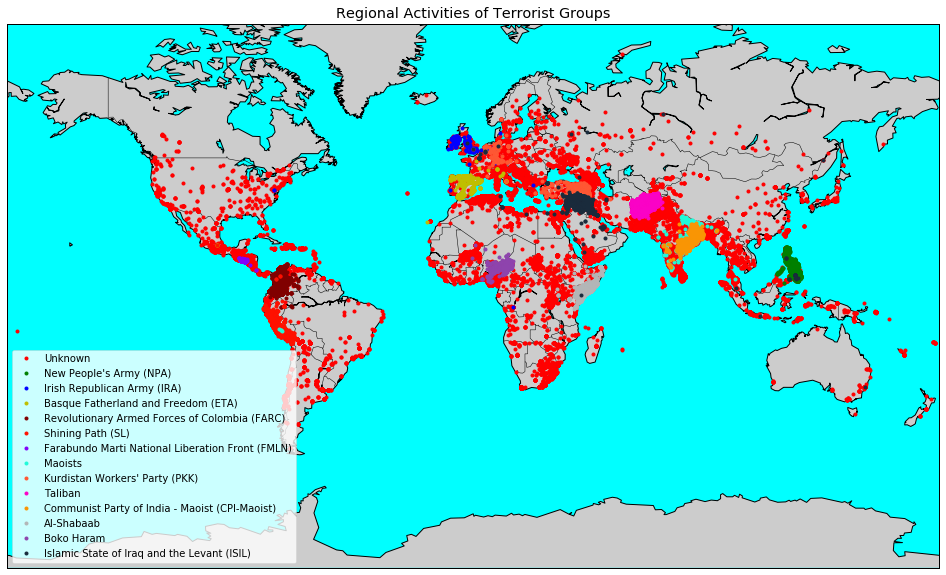

In [14]:
top_groups=terrorism_df[terrorism_df['Group'].isin(terrorism_df['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

MovieWriter PillowWrite unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.



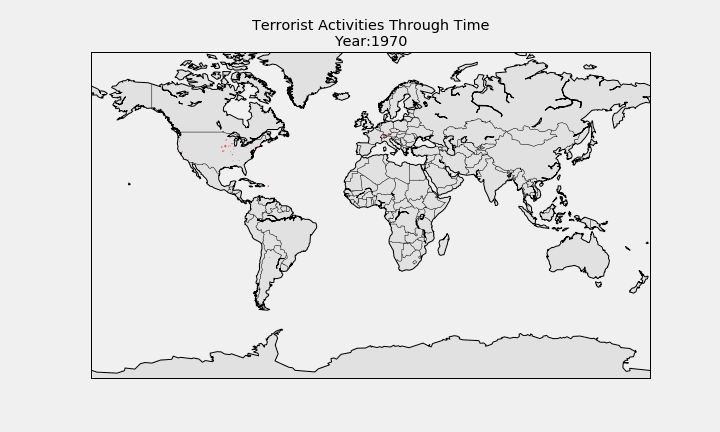

In [19]:
fig = plt.figure(figsize = (10,6))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorist Activities Through Time'+'\n'+'Year:' +str(Year))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(terrorism_df[terrorism_df['Year']==Year].latitude)
    long6=list(terrorism_df[terrorism_df['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(terrorism_df[terrorism_df['Year']==Year].Killed,terrorism_df[terrorism_df['Year']==Year].Wounded)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(terrorism_df.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='PillowWrite', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [22]:
#Basemap?

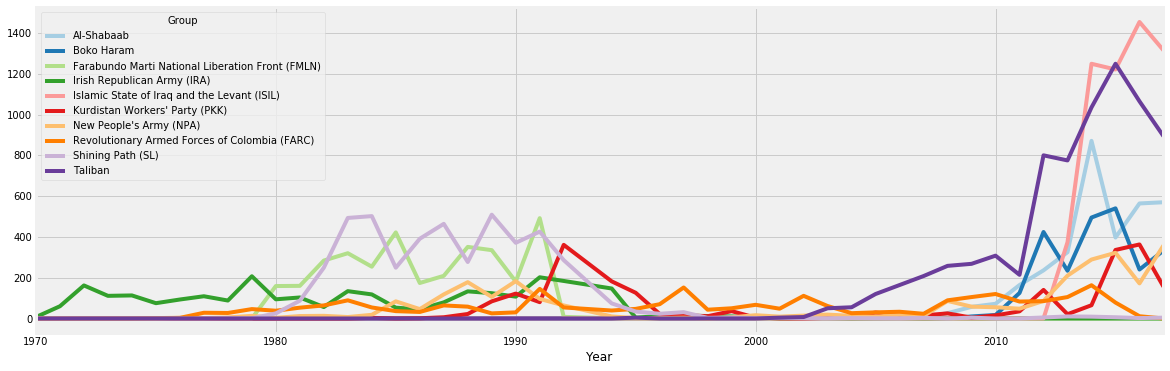

In [30]:
top_groups10=terrorism_df[terrorism_df['Group'].isin(terrorism_df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show() 

In [33]:
terrorism_df['Group'].value_counts().shape[0]

3537

In [41]:
print('Country with Highest Terrorist Attacks:',terrorism_df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terrorism_df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terrorism_df['Killed'].max(),'that took place in',terrorism_df.loc[terrorism_df['Killed'].idxmax()].Country)
print('Total Attacks:',len(terrorism_df))
print('Attacks between:', terrorism_df['Year'].min(),'--',terrorism_df['Year'].max())
print('Total Deaths:', terrorism_df['Killed'].sum())
print('Total Wounded:', terrorism_df['Wounded'].sum())
print('Total Casualities:', terrorism_df['total_effected'].sum())
print('Total Unique Groups',terrorism_df['Group'].value_counts().shape[0]-1)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Total Attacks: 181691
Attacks between: 1970 -- 2017
Total Deaths: 411868.0
Total Wounded: 523869.0
Total Casualities: 872892.0
Total Unique Groups 3536
